<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis (EDA). EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

Problems 1 thru 6 use a small dataset on state SAT scores.

Problems 7 thru 12 use a fraction of the Iowa Liquor Sales dataset (described in more detail in question 7).

---

This project includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
sat_filepath = '../../../x/DSI-SF-4/datasets/state_sat_scores/sat_scores.csv'
with open(sat_filepath, 'r') as f:
    the_data = [row.strip().split(',') for row in f]

sat_dict = {row[0]:row[1:] for row in zip(*the_data)}
print sat_dict

{'Math': ('510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'), 'State': ('CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'), 'Rate': ('82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', 

### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
sat = pd.DataFrame.from_dict(sat_dict.items(), orient='columns').T
sat.head()
sat.dtypes

0    object
1    object
2    object
3    object
dtype: object

In [4]:
sat = pd.read_csv(sat_filepath)
sat.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [5]:
sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [6]:
#The difference is that when we pass in the dictionary, the objects are dtype 'object,' because that was the most
#relevant descriptor for all of the data in the dictionary (which included States and Numbers), which includes strings
#and integers. However, when we use the pandas read_csv function, the features 'Rate','Verbal', and 'Math' are
#all read in uniquely, and hence get the dtype "int64."

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values). 

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
sat.head(10)
#The data looks like the average Verbal and Math scores for particular states, with the Rating being a little less
#clear. But I would assume that the Rate indicates the percentile average that the corresponding Verbal and Math scores
#represent.

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

Variables:

    State - The State abbreviation, including District of Columbia
    Rate - The mean percentage score based on the Verbal and Math scores of the State
    Verbal - The mean State score for the verbal section of the SAT
    Math - The mean State score for the math section of the SAT

Shape of SAT dataset:
    
    52 Rows, 4 columns. 52 Rows correspond to every state of the United States, plus District of Columbia, plus an aggergated record.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

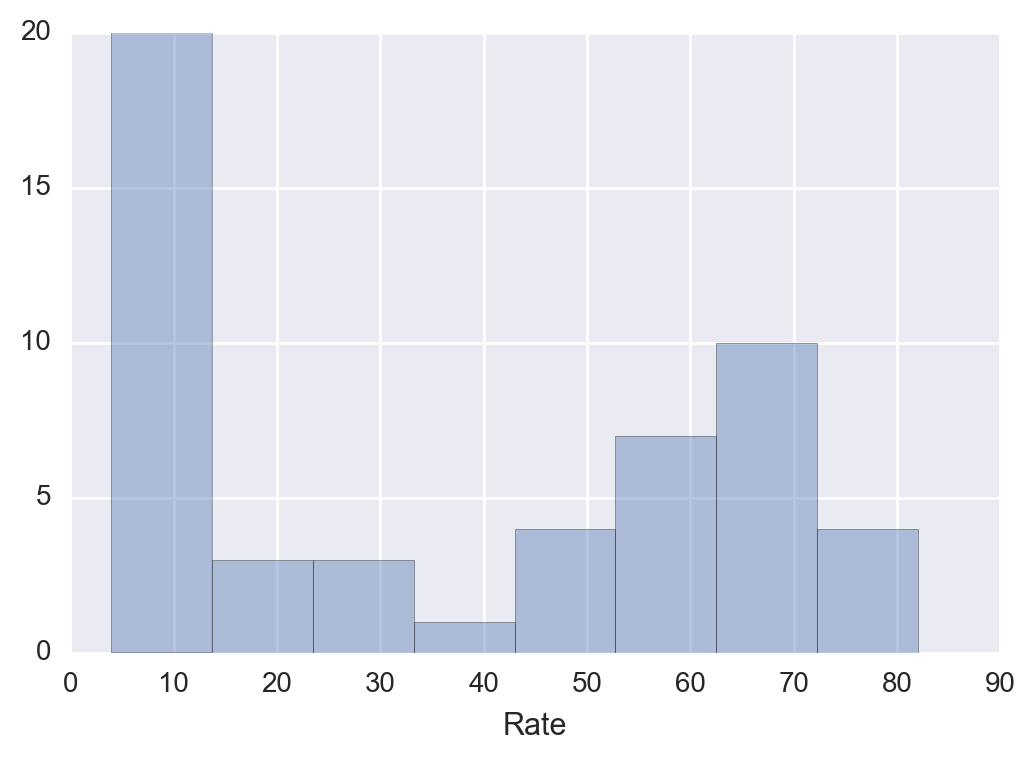

In [8]:
# fig, ax_array1 = plt.subplots(1,2,3 figsize=(12,12))

# ax1, ax2, ax3 = ax_array1[0], ax_array1[1], ax_array1[2]

# ax1 = sns.distplot(sat['Rate'], ax=ax1)
# ax2 = sns.distplot(sat['Math'], ax=ax2)
# ax3 = sns.distplot(sat['Verbal'], ax=ax3)

sns.distplot(sat['Rate'], bins=8, kde=False)

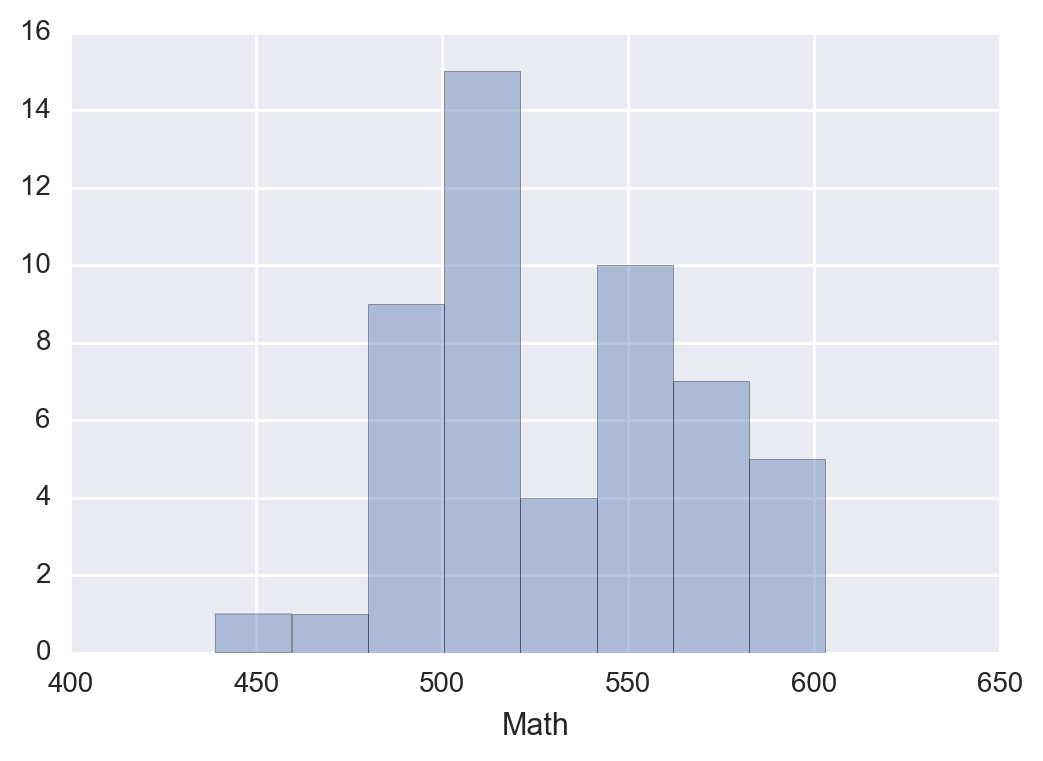

In [9]:
sns.distplot(sat['Math'], bins=8, kde=False)

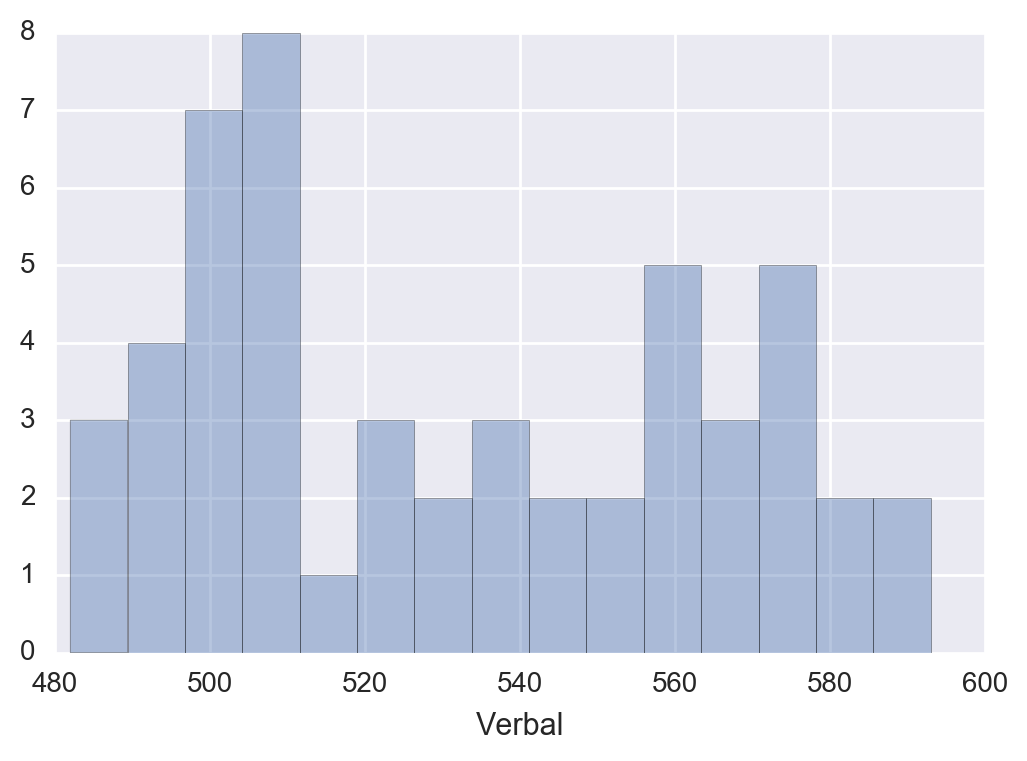

In [10]:
sns.distplot(sat['Verbal'], bins=15, kde=False)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

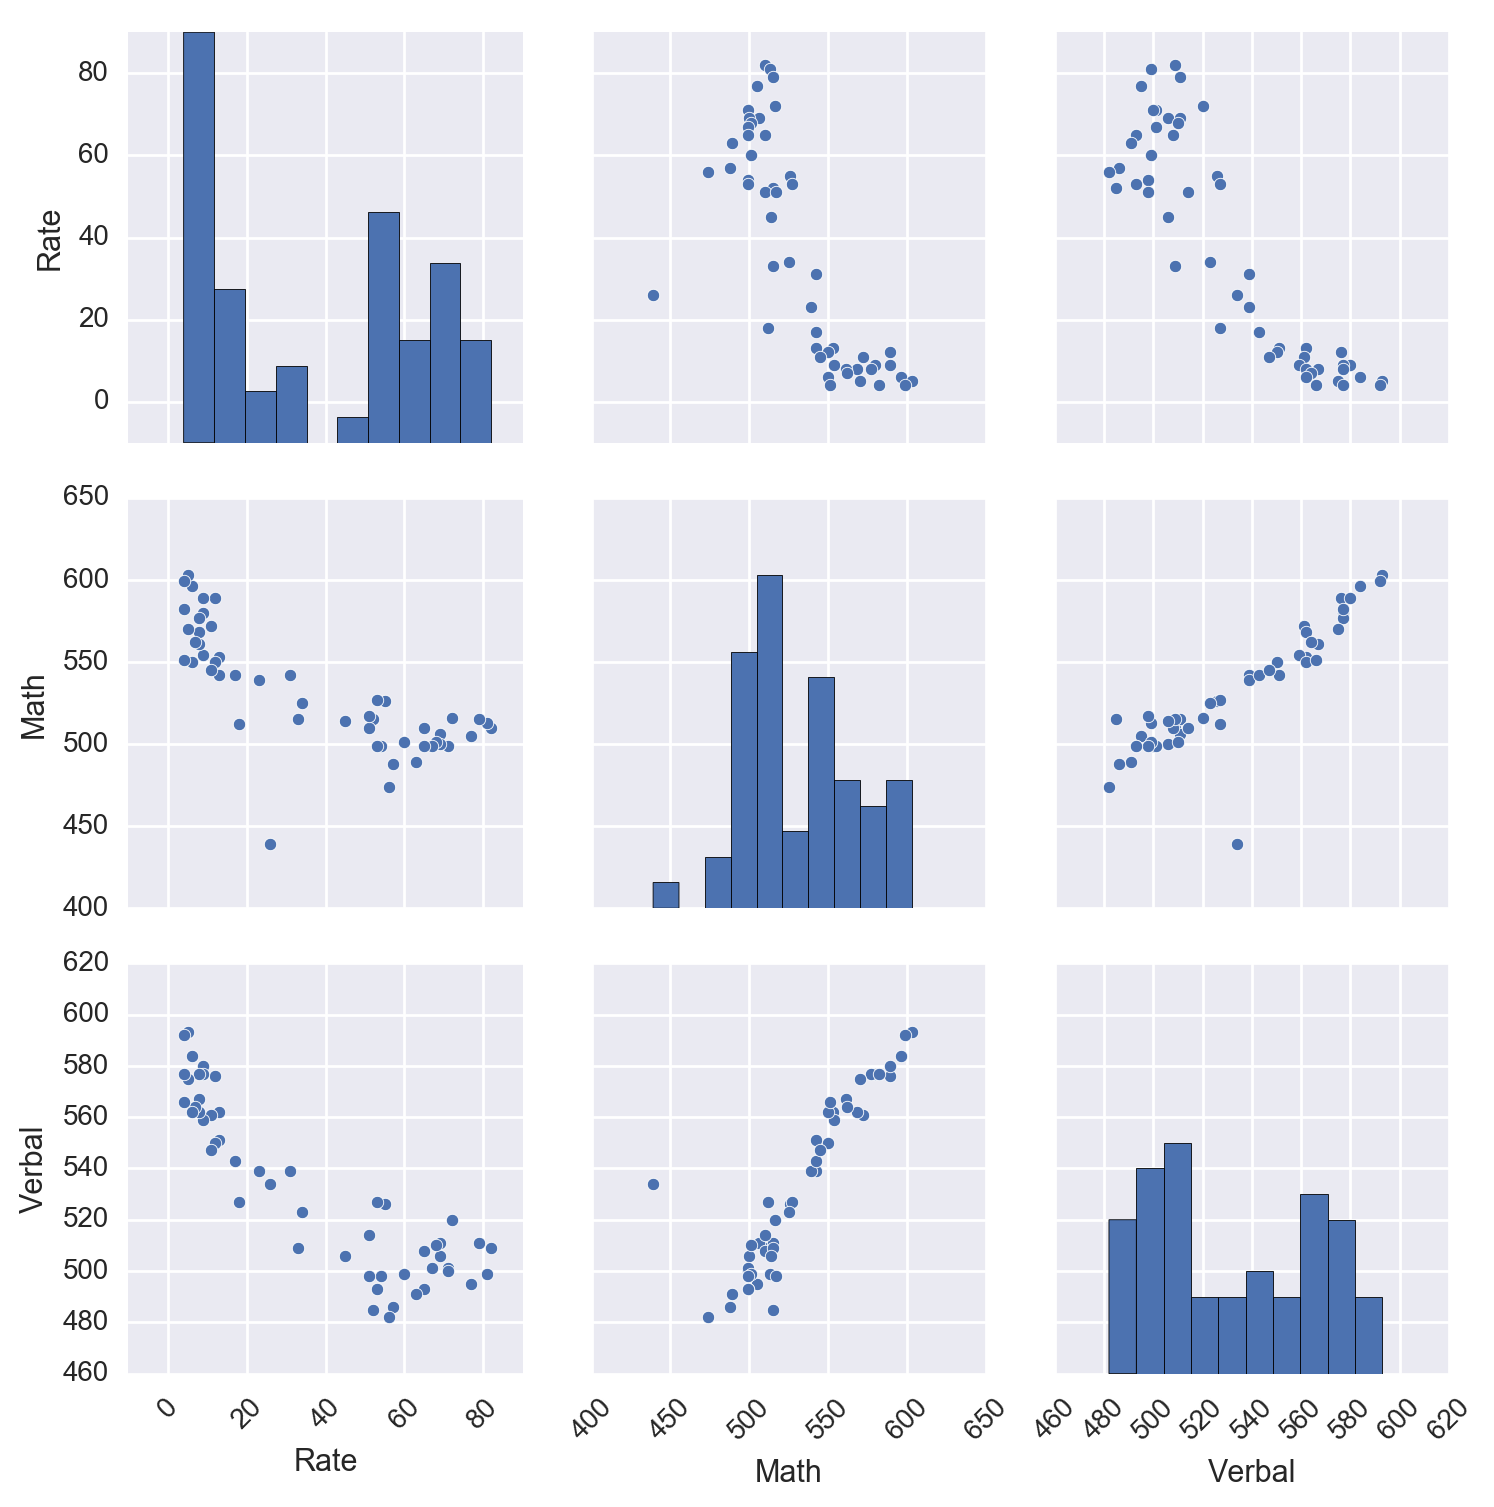

In [11]:
pairsat = sns.pairplot(sat[["Rate", "Math", "Verbal"]], diag_kind="hist")

for ax in pairsat.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

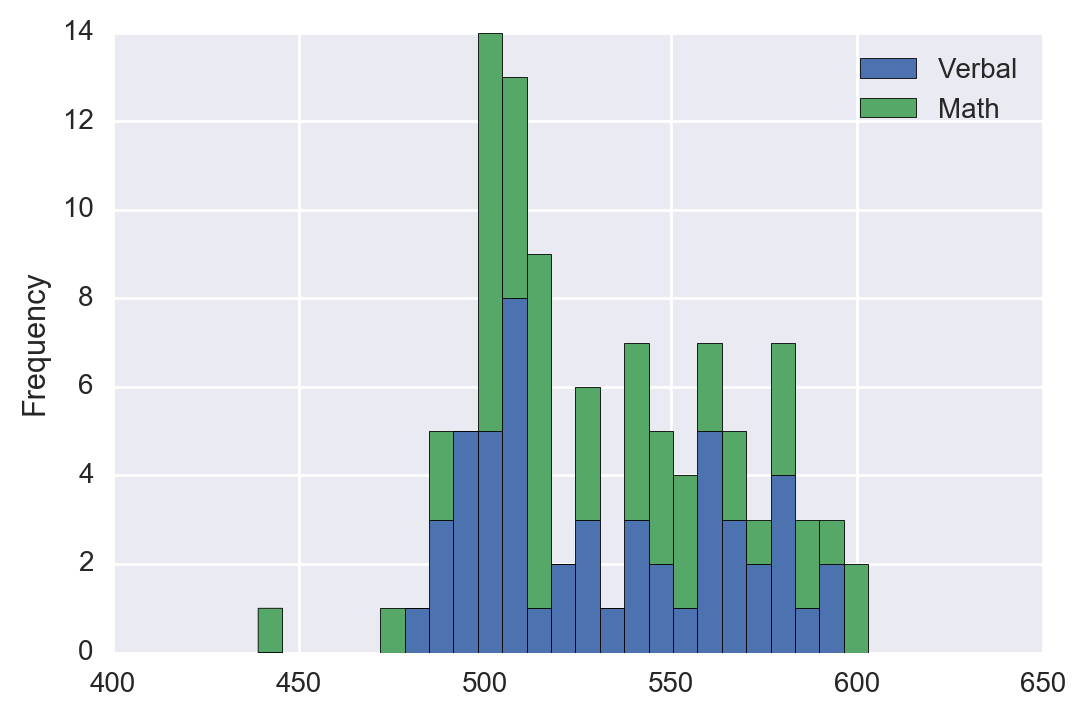

In [12]:
sat[['Verbal','Math']].plot.hist(stacked=True, bins=25)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots (pandas or seaborn)

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

In [13]:
#The boxplot displays relative distribution of the series of data, and make straight-forward comparisons.
#For instance, we can clearly see that while the
#of data for Math is quite wide, in fact 50% of scores are within about 50 points.
#The Rate box-plot is on a different scale than are the Math and Verbal, because the latter two are based on a score
#out of 800. Rate is scaled out of 100.

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x11ae94a50>,
 'caps': [<matplotlib.lines.Line2D at 0x11aea3b50>,
 'fliers': [<matplotlib.lines.Line2D at 0x11aeafe50>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11aeaf810>,
 'whiskers': [<matplotlib.lines.Line2D at 0x11ae94e10>,
  <matplotlib.lines.Line2D at 0x11aec6150>]}

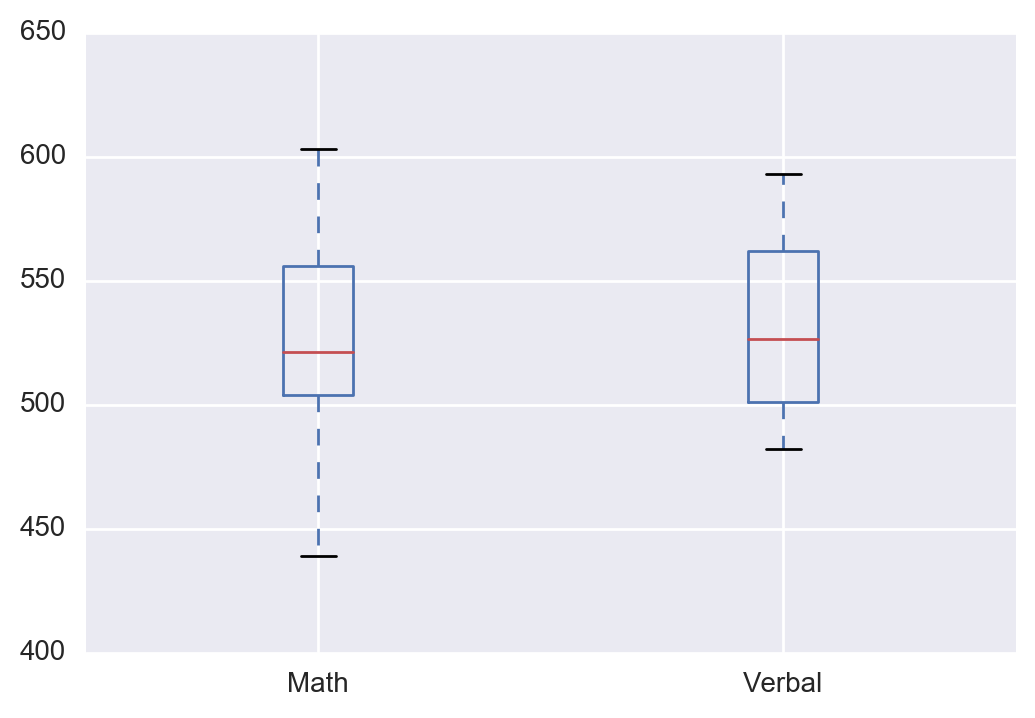

In [14]:
sat.boxplot(['Math','Verbal'])

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart (pandas or seaborn)

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [15]:
#I decided to normalize each series across the SAT Dataframe, which returns values that allow us to make direct
#statistical comparisons with specific attributes, like range and standard deviation.

//anaconda/lib/python2.7/site-packages/pandas/core/ops.py:995: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 52
  yrav = yrav[mask]
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


{'boxes': [<matplotlib.lines.Line2D at 0x11b37fd10>,
 'caps': [<matplotlib.lines.Line2D at 0x11b38dc50>,
 'fliers': [<matplotlib.lines.Line2D at 0x11b399f50>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11b399910>,
 'whiskers': [<matplotlib.lines.Line2D at 0x11b37ff10>,
  <matplotlib.lines.Line2D at 0x11b3cae10>]}

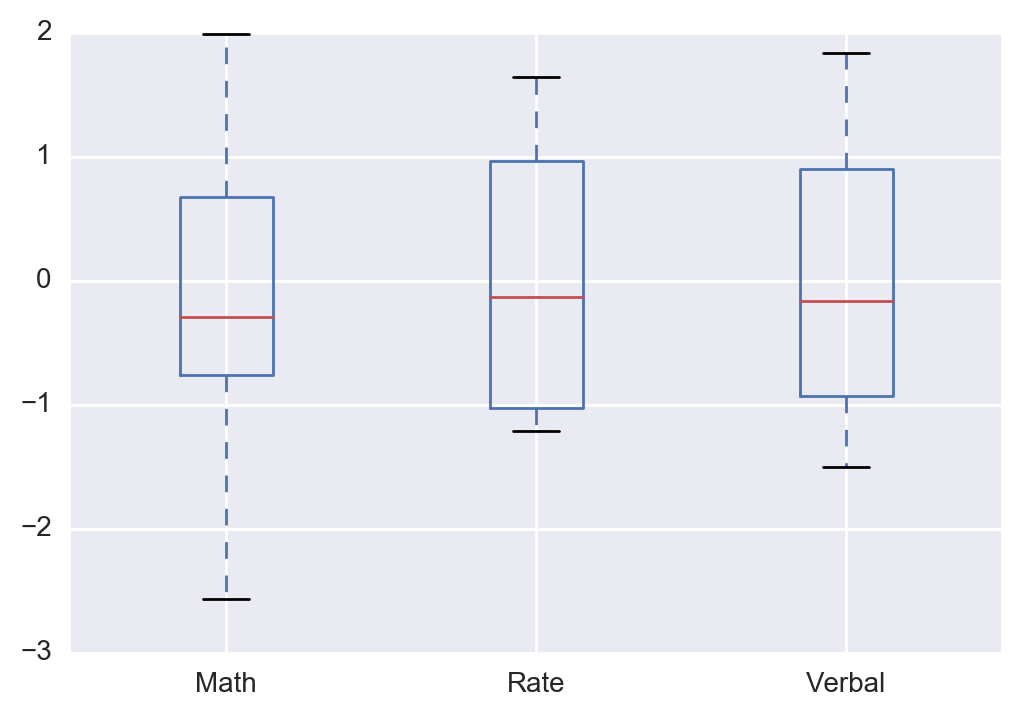

In [16]:
xVerbal = (sat.Verbal-sat.Verbal.mean()) / sat.Verbal.std()
xMath = (sat.Math-sat.Math.mean()) / sat.Math.std()
xRate = (sat.Rate-sat.Rate.mean()) / sat.Rate.std()

# sat2 = sat.remove(sat.State, axis=0, inplace=True)
normed_sat = (sat - sat.mean()) / sat.std()

normed_sat.boxplot()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?



In [17]:
verbal_avg = sat.Verbal.mean()
verbal_avg #= 532

above_avg = sat.Verbal[sat.Verbal > verbal_avg]
above_avg.count() #24 states above mean, so this means that the verbal distribution is roughly normally distributed
above_avg

26    539
27    534
28    539
30    543
31    562
32    551
33    576
34    550
35    547
36    561
37    580
38    577
39    559
40    562
41    567
42    577
43    564
44    584
45    562
46    575
47    593
48    577
49    592
50    566
Name: Verbal, dtype: int64

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [18]:
verbal_med = sat.Verbal.median()
verbal_med #= 526.5

above_med = sat.Verbal[sat.Verbal > verbal_med]
above_med.count() #26 states high higher than median scores, which tells us that more states are above the median,
#than are above the mean. This indicates a modest right skew in the data

26

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [19]:
sat["Verbal_Math_Diff"] = sat.Verbal - sat.Math
sat.head()

,State,Rate,Verbal,Math,Verbal_Math_Diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [20]:
verb_over_math = sat.sort_values("Verbal_Math_Diff", ascending=False).iloc[:10,:]

math_over_verb = sat.sort_values("Verbal_Math_Diff", ascending=False).iloc[-10:,:]

verb_over_math.head(3), math_over_verb.head(3)

(   State  Rate  Verbal  Math  Verbal_Math_Diff
 27    OH    26     534   439                95
 50    MS     4     566   551                15
 29    WV    18     527   512                15,
    State  Rate  Verbal  Math  Verbal_Math_Diff
 51   All    45     506   514                -8
 37    MN     9     580   589                -9
 3     NY    77     495   505               -10)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [21]:
sat.corr() #This tells us the relative statistial dependence that differing variables across the dataframe
#have with each other

,Rate,Verbal,Math,Verbal_Math_Diff
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Verbal_Math_Diff,-0.101412,0.052600,-0.388219,1.000000


### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [22]:
sat.describe()
# Count indicates the number of rows that we have (which is 52, 1 which is DC, and the other which sums the features
# Mean indicates the average value of each of the features
#Std indicates std deviation
#min is lowest value, max is highest value
#percentages indicate percentiles of data (as might be used for a boxplot)

,Rate,Verbal,Math,Verbal_Math_Diff
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Load Iowa Liquor Sales dataset

---

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.


In [23]:
iowa_file = '../../../x/DSI-SF-4/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 7.1 Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [24]:
liquor = pd.read_csv(iowa_file)
liquor.head(3)
#columns: Date, the unique store identifier, the location across [city, zip, county number, county name], 
# the category number and name, the vendor number, item number, item desc, 
# and then bottling and cost info like [bottle volume, state bottle cost/retail, bottles sold, sale value
#, and volume sold (in liters and gallons respectively)]

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34


In [25]:
liquor.info()
# the various information is structured column-wise as objects, floats, and integers. Featuers with notably less
# values include County Number, County, Category, and Category Name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Clean the liquor dataset

---

### 8.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [26]:
# As I mentioned in the previous problem, County Number, County, Category, and Category Name have lots of empty cells,
# so I'm already thinking that we'll have to drop rows so that every record has values in every cell
# As far as cleaning/converting columns, it may be useful to normalize units across the ml and Liters columns and...
#Zip should be an integer (not an object)
#State bottle cost can be changed to a float (is an object now) - and same for state bottle retail, Sale (dollars)

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 8.2 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

In [27]:
# liquor['State Bottle Cost'] = liquor['State Bottle Cost'].str.replace("$","").astype(float)
# liquor['State Bottle Retail'] = liquor['State Bottle Retail'].str.replace("$","").astype(float)
# liquor['Sale (Dollars)'] = liquor['Sale (Dollars)'].str.replace("$","").astype(float)
liquor.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to handle missing data for stores not open for the full 2015 year. Do you impute? Remove the stores? Something else?
3. Implement your plan.
4. Briefly report on what you did and why.


In [32]:
# liquor.dtypes

In [63]:
def pull_month(x):
    try:
        x = x.split('/')
        x = x[0]
        return x
    except:
        return np.nan
    

def pull_year(x):
    try:
        x = x.split('/')
        x = x[2]
        return x
    except:
        return np.nan
    
liquor['month'] = liquor['Date'].map(pull_month)
liquor['year'] = liquor['Date'].map(pull_year)

liquor_year_2015 = liquor[liquor.year == '2015'].groupby(['Store Number', 'month']).count().sort_values('year', ascending=False)

liquor_year_2015
# x = liquor.groupby(['Store Number'])[['month']].count().sort_values('month')
# x

Date  City  Zip Code  County Number  County  Category  \
Store Number month                                                          
2633         03      194   194       194            194     194       194   
             11      184   184       184            184     184       184   
4829         04      180   180       180            180     180       180   
2633         07      179   179       179            179     179       179   
             05      177   177       177            177     177       177   
4829         06      176   176       176            176     176       176   
2633         06      175   175       175            175     175       175   
             10      173   173       173            173     173       173   
             08      173   173       173            173     173       173   
4829         03      172   172       172            172     172       172   
2515         12      167   167       167            167     167       167   
2633         02      161   161       161            161     161       161   
4829         07      161   161       161            161     161       161   
2633         04      159   159       159            159     159       159   
4829         05      157   157       157            157     157       157   
2633         12      157   157       157            157     157       157   
4829         12      151   151       151            151     151       151   
             09      151   151       151            151     151       151   
2619         12      149   149       149            149     149       149   
4829         01      147   147       147            147     147       147   
2633         09      147   147       147            147     147       147   
2572         12      146   146       146            146     146       146   
2670         12      145   145       145            145     145       145   
4829         10      144   144       144            144     144       144   
2620         06      143   143       143            143     143       143   
2501         04      140   140       140            140     140       140   
2500         09      139   139       139            139     139       139   
2603         12      138   138       138            138     138       138   
2620         07      138   138       138            138     138       138   
2190         03      137   137       137            137     137       137   
...                  ...   ...       ...            ...     ...       ...   
4539         10        1     1         1              1       1         1   
             11        1     1         1              1       1         1   
4980         03        1     1         1              1       1         1   
4532         10        1     1         1              1       1         1   
4529         03        1     1         1              1       1         1   
4980         07        1     1         1              1       1         1   
4529         05        1     1         1              1       1         1   
4985         11        1     1         1              1       1         1   
4529         09        1     1         1              1       1         1   
4530         06        1     1         1              1       1         1   
4531         03        1     1         1              1       1         1   
             06        1     1         1              1       1         1   
             08        1     1         1              1       1         1   
4983         11        1     1         1              1       1         1   
             10        1     1         1              1       1         1   
             09        1     1         1              1       1         1   
             07        1     1         1              1       1         1   
             04        1     1         1              1       1         1   
4982         08        1     1         1              1       1         1   
4531         12 

In [ ]:
# liquor.tail()
# store_count = liquor['Store Number'].unique()
# store_count 
# liquor.groupby(['Store Number'])['Date'].unique()
#make a mask if they have values in 2015/2016, or in each month of 2015, then in each month of 2016


# liquor['Date'] = pd.to_datetime(liquor['Date'])
# liquor.head()
# boolean_date_mask_1 = (liquor['Date'] >= '2015-01-01') & (liquor['Date'] <= '2015-01-31') &
# (liquor['Date'] >= '2015-02-01') & (liquor['Date'] <= '2015-02-28') &
# (liquor['Date'] >= '2015-03-01') & (liquor['Date'] <= '2015-03-31') &
# (liquor['Date'] >= '2015-04-01') & (liquor['Date'] <= '2015-04-30') &
# (liquor['Date'] >= '2015-05-01') & (liquor['Date'] <= '2015-05-31') &
# (liquor['Date'] >= '2015-06-01') & (liquor['Date'] <= '2015-06-30') &
# (liquor['Date'] >= '2015-07-01') & (liquor['Date'] <= '2015-07-31') &
# (liquor['Date'] >= '2015-08-01') & (liquor['Date'] <= '2015-08-31') &
# (liquor['Date'] >= '2015-09-01') & (liquor['Date'] <= '2015-09-30') &
# (liquor['Date'] >= '2015-10-01') & (liquor['Date'] <= '2015-10-31') &
# (liquor['Date'] >= '2015-11-01') & (liquor['Date'] <= '2015-11-30') &
# (liquor['Date'] >= '2015-12-01') & (liquor['Date'] <= '2015-12-31') &

# (liquor['Date'] <= '2015-10-31')

# liquor_2015 = liquor.loc[boolean_date_mask]
# liquor_2015.groupby(['Store Number'])['Date'].unique()

# liquor.groupby(['Store Number'])

# store_mask = liquor[liquor['Store Number']

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Examine liquor profits

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 10.1 Calculate yearly liquor sales for each store in 2015.

In [ ]:
liquor['Date'] = pd.to_datetime(liquor['Date'])
liquored = liquor.dropna()
liquored.head()

In [ ]:
boolean_year_mask = (liquored['Date'] >= '2015-01-01') & (liquored['Date'] <= '2015-12-31')
sales_2015 = liquored[boolean_year_mask].groupby(['Store Number'])[['Sale (Dollars)']].sum()
sales_2015[['Sale (Dollars)']].sort_values('Sale (Dollars)', ascending=False).head()

### 10.2 Calculate the profit each store is making in 2015.


In [ ]:
liquored['State Bottle Profit'] = (liquored['State Bottle Retail'] - liquored['State Bottle Cost']) * liquored['Bottles Sold']
liquored.head()
store_2015_profits = liquored[boolean_year_mask].groupby(['Store Number'])[['State Bottle Profit']].sum()
store_2015_profits[['State Bottle Profit']].sort_values('State Bottle Profit', ascending=False).head() # = $1,069,959.82

### 10.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [ ]:
liquored['Profit_gallon_2015'] = liquored['State Bottle Profit'] / liquored['Volume Sold (Gallons)']
# liquored.head()

In [ ]:
store_profits_by_gallon_2015 = liquored[boolean_year_mask].groupby(['Store Number'])[['Profit_gallon_2015']].sum()
store_profits_by_gallon_2015
store_profits_by_gallon_2015[['Profit_gallon_2015']].sort_values('Profit_gallon_2015', ascending=False).head()

### 10.4 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [ ]:
liquored['Category Name'].unique()

def sub_cat_liquor(cat_name):
    if 'brandies' in cat_name.lower():
        return 'Brandy'
    elif 'whiskies' in cat_name.lower():
        return 'Whisky'
    elif 'vodka' in cat_name.lower():
        return 'Vodka'
    elif 'schnapps' in cat_name.lower():
        return 'Schnapps'
    elif 'rum' in cat_name.lower():
        return 'Rum'
    elif 'tequila' in cat_name.lower():
        return 'Tequila'
    elif 'gin' in cat_name.lower():
        return 'Gin'
    elif 'liqueur' in cat_name.lower():
        return 'Liqueur'
    else:
        return 'Other'
    
liquored['Metacategory_Name'] = liquored['Category Name'].map(sub_cat_liquor)
liquored.head()

### 10.5 Do relationships exist between the broader liquor type and profit?

In [ ]:
liquored['Category Name'].unique()

In [ ]:
y = liquored.groupby('Metacategory_Name')[['Profit/gallon_2015']].mean().reset_index()
y.sort_values('Profit/gallon_2015', ascending=False)
y.sort_values('Profit/gallon_2015', ascending=False).plot(kind='line', x='Metacategory_Name', y='Profit/gallon_2015',
                                                          title='Relationship between Liquor Type and Profit per gallon')
#There are rough relationships whereby the type of liquor that accounts for the highest profit per gallon is Tequila,
#followed by Brandy, Liqueur and Whisky. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Proposing a new liquor tax

---

### The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [ ]:
liquored.columns.unique()
#could be that we take the total sales and then figure out which metacategory they belong to

tax_targets = liquored.groupby(['Metacategory_Name'])[['Sale (Dollars)']].sum().sort_values('Sale (Dollars)', ascending=False)
tax_targets

#My idea was that we could first look at the total sales in dollars that the variety of alcohol types
# command across all the stores. This gives us a measure for transaction value, regardless of store size or county.
#From here, we can apply a sliding scale of taxation, where Whisky can have the highest tax rate, followed by Vodka,
#and Rum, corresponding to their respective popularity. 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 2 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.
